# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis
- datetime: (optional)

In [1]:
%load_ext autoreload
%autoreload 2

In [178]:
from model import MODEL
import utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [242]:
tickers = ['BTC-USD', 'XRP-USD']
model = MODEL(tickers=tickers)

In [243]:
start_date = '2020-01-01'
model.get_data(start=start_date, interval='60m', threads=1)

[*********************100%***********************]  2 of 2 completed


In [244]:
day_hour = 10
start_date_range = pd.Timestamp(2020, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range)

[INFO]: filter applied.


In [245]:
model._init_model()

[WARNING]: Ignoring second entry of gradient!


In [251]:
model.eval_model()

|                                  PRICE MODEL                                   |
|                                  Version 0.3                                   |
|                   Authors: Marco Rosenzweig & Patrick Lorenz                   |
----------------------------------------------------------------------------------
|                        ticker = ['BTC-USD', 'XRP-USD']                         |
|                             start date = 01/01/20                              |
|                              end date = 04/12/20                               |
|                      initial investment per ticker = 200                       |
[TICKER]: BTC-USD
[INFO]: Open position.
[INFO]: No tax paid.
[INFO]: Last entry of "Sell Dates" will be assigned equally as the penultimate one.
----------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 7.4470921535%
[SUMMARY]: Average trade loss: -1.9094439941%
[SUMMARY]: Effici

In [248]:
model.ticker_df['BTC-USD']

,Buy Dates,Sell Dates,Buy Prices,Sell Prices,Trade Reward,Trade Win,Trade Efficiency
0,2020-01-10 10:00:00,2020-01-12 10:00:00,7795.303217,8111.718249,208.118094,8.118094,0.040590
1,2020-01-13 10:00:00,2020-01-15 10:00:00,8165.026612,8723.308437,222.348121,14.230027,0.068375
2,2020-01-21 10:00:00,2020-01-22 10:00:00,8690.157882,8634.341646,220.919996,-1.428125,-0.006423
3,2020-01-24 10:00:00,2020-01-29 10:00:00,8295.156315,9355.800567,249.167507,28.247512,0.127863
4,2020-02-04 10:00:00,2020-02-07 10:00:00,9208.892237,9751.618849,263.852209,14.684702,0.058935
5,2020-02-08 10:00:00,2020-02-09 10:00:00,9819.497716,10041.326909,269.812812,5.960602,0.022591
6,2020-02-11 10:00:00,2020-02-13 10:00:00,9819.107917,10118.744532,278.046329,8.233518,0.030516
7,2020-02-17 10:00:00,2020-02-19 10:00:00,9767.435061,10074.506585,286.787632,8.741303,0.031438
8,2020-02-21 10:00:00,2020-02-24 10:00:00,9704.414941,9712.027397,287.012598,0.224965,0.000784
9,2020-02-28 10:00:00,2020-03-06 10:00:00,8620.244783,9109.852196,303.314165,16.301567,0.056797


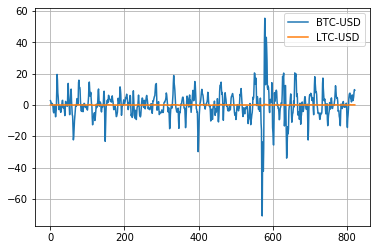

In [111]:
for ticker in tickers:
    plt.plot(model.grad[ticker], label=ticker)
plt.legend()
plt.grid()
plt.show()